In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("/Users/technodom/Desktop/Data Science Outpeer/waterQuality1.csv")
df.head()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [4]:
df.shape


(7999, 21)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [6]:
missing_value = ['#NUM!', np.nan]
df = pd.read_csv("/Users/technodom/Desktop/Data Science Outpeer /waterQuality1.csv", na_values = missing_value)
df.isnull().sum()


aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        3
dtype: int64

In [7]:
df.dropna(subset=['ammonia', 'is_safe'], axis=0, inplace=True)


In [8]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [11]:
df.corr()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,...,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,...,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,...,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,...,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,...,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,...,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,...,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,...,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,...,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,...,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077


In [12]:
df['is_safe'].value_counts()


0.0    7084
1.0     912
Name: is_safe, dtype: int64

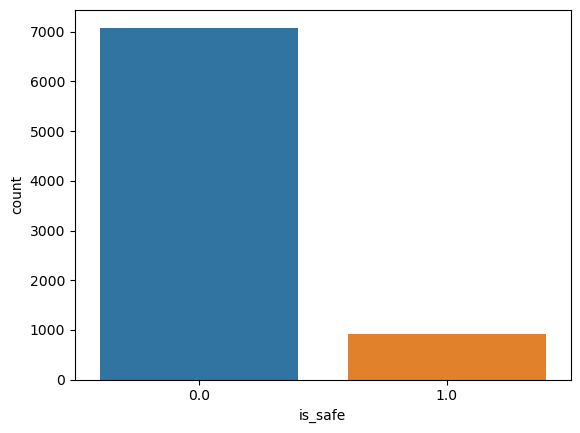

In [14]:
sns.countplot(x='is_safe', data=df)
plt.show()

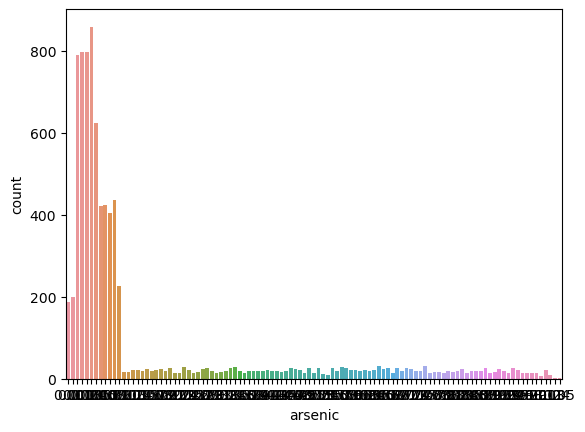

In [15]:
sns.countplot(df['arsenic'])
plt.show()


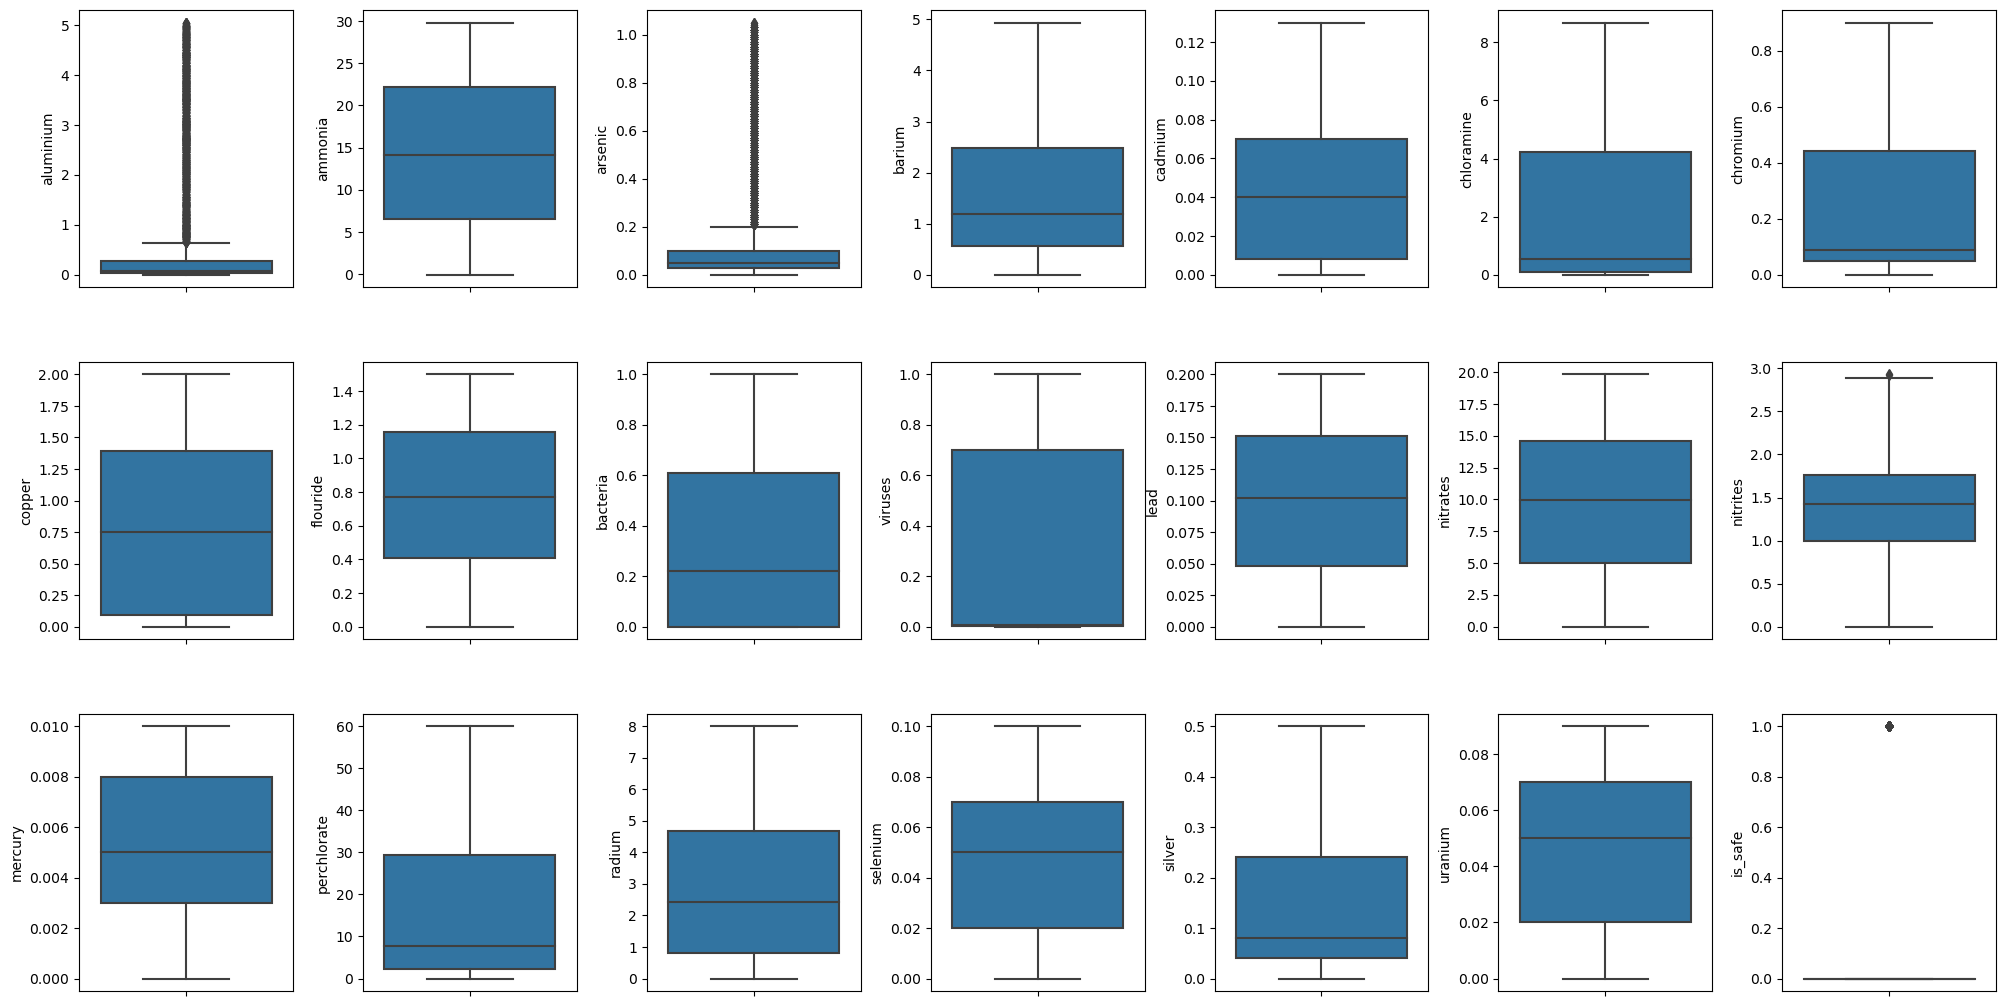

In [16]:
fig, ax = plt.subplots(ncols=7, nrows=3, figsize=(20,10))
count = 0
ax = ax.flatten()
for i, value in df.items():
    sns.boxplot(y=i, data=df, ax=ax[count])
    count += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

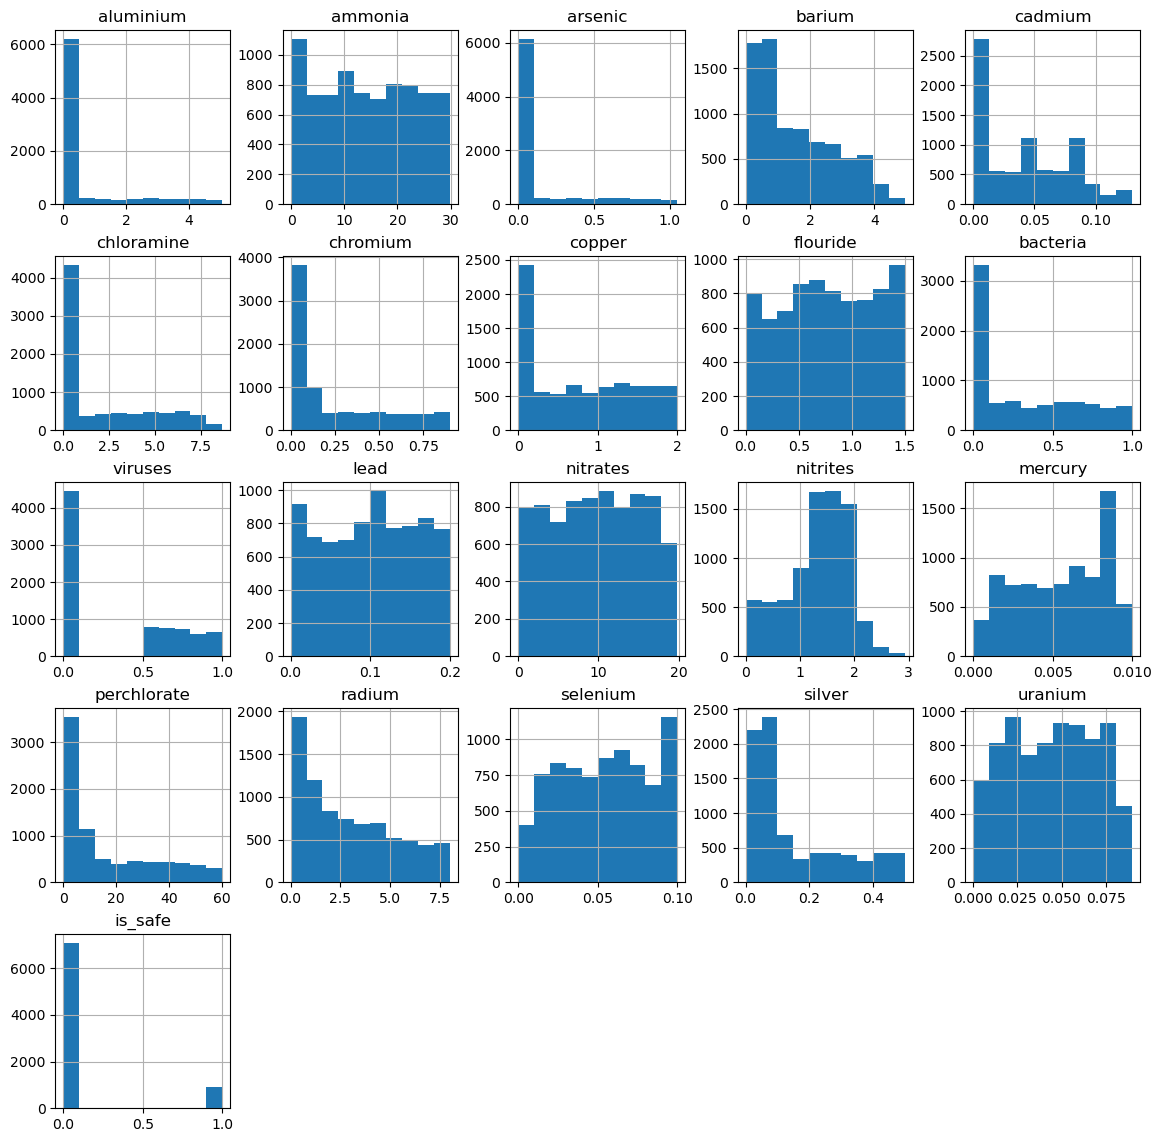

In [17]:
df.hist(figsize=(14, 14))
plt.show()


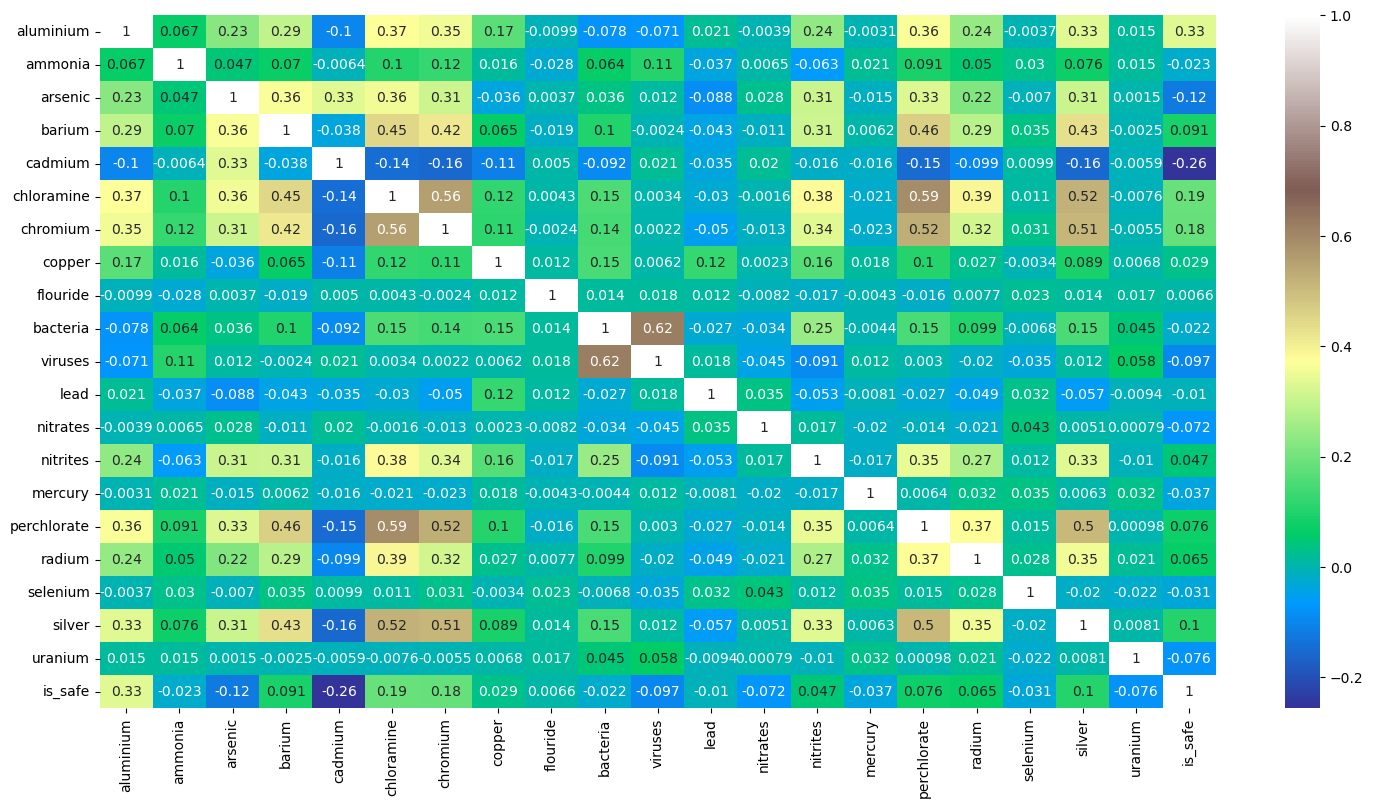

In [18]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True, cmap='terrain')
plt.show()


In [19]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [20]:
y.value_counts()


0.0    7084
1.0     912
Name: is_safe, dtype: int64

In [22]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.8 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [23]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
x_resample, y_resample = nm.fit_resample(x, y)
from collections import Counter
print('Форма исходного набора данных {}'.format(Counter(y)))
print('Форма сбалансированного набора данных {}'.format(Counter(y_resample)))


Форма исходного набора данных Counter({0.0: 7084, 1.0: 912})
Форма сбалансированного набора данных Counter({0.0: 912, 1.0: 912})


In [24]:
from scipy.stats import ttest_ind


In [25]:
arsenic_safe = df[df['is_safe'] == 1]['arsenic']
arsenic_unsafe = df[df['is_safe'] == 0]['arsenic']


In [26]:
t_stat, p_value = ttest_ind(arsenic_safe, arsenic_unsafe)


In [27]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -11.11458932209233
P-value: 1.7218152957013284e-28


In [28]:
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: концентрация мышьяка статистически значимо различается между безопасной и небезопасной водой.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: статистически значимых различий в концентрации мышьяка между безопасной и небезопасной водой не обнаружено.")


Отвергаем нулевую гипотезу: концентрация мышьяка статистически значимо различается между безопасной и небезопасной водой.


In [29]:
bacteria_safe = df[df['is_safe'] == 1]['bacteria']
bacteria_unsafe = df[df['is_safe'] == 0]['bacteria']


In [30]:
t_stat, p_value = ttest_ind(bacteria_safe, bacteria_unsafe)


In [31]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -1.9744057495608973
P-value: 0.04836998993933254


In [32]:
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: уровень бактерий статистически значимо различается между безопасной и небезопасной водой.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: статистически значимых различий в уровне бактерий между безопасной и небезопасной водой не обнаружено.")


Отвергаем нулевую гипотезу: уровень бактерий статистически значимо различается между безопасной и небезопасной водой.


In [35]:
flouride_safe = df[df['is_safe'] == 1]['flouride']
flouride_unsafe = df[df['is_safe'] == 0]['flouride']


In [36]:
t_stat, p_value = ttest_ind(flouride_safe, flouride_unsafe)

In [37]:
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 0.5856643047104502
P-value: 0.5581176589237133


In [39]:
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу: концентрация фторида статистически значимо различается между безопасной и небезопасной водой.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: статистически значимых различий в концентрации фторида между безопасной и небезопасной водой не обнаружено.")


Не удалось отвергнуть нулевую гипотезу: статистически значимых различий в концентрации фторида между безопасной и небезопасной водой не обнаружено.


In [40]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

In [41]:
from sklearn.model_selection import train_test_split

In [45]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=2)

In [46]:
xtrain.shape


(5597, 20)

In [47]:
xtest.shape


(2399, 20)

In [48]:
ytest.shape

(2399,)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [57]:
def classify(model):
    model.fit(xtrain, ytrain)
    print("The accuracy of this model is: ", model.score(xtest, ytest) * 100)
    predict = model.predict(xtest)
    print(classification_report(ytest, predict))

The accuracy of this model is:  95.53980825343893
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2140
         1.0       0.86      0.71      0.77       259

    accuracy                           0.96      2399
   macro avg       0.91      0.85      0.87      2399
weighted avg       0.95      0.96      0.95      2399

Gradient Boosting Classifier Confusion Matrix


<AxesSubplot:>

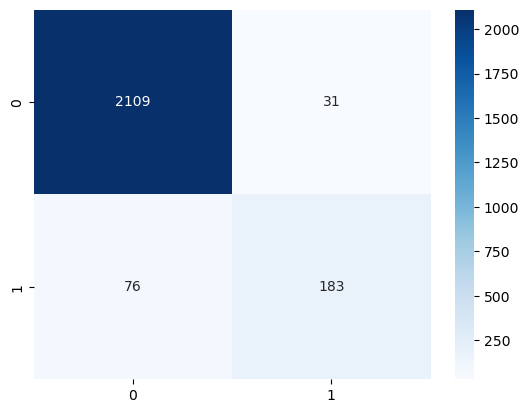

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classify(gbc)
print('Gradient Boosting Classifier Confusion Matrix')
y_pred = gbc.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

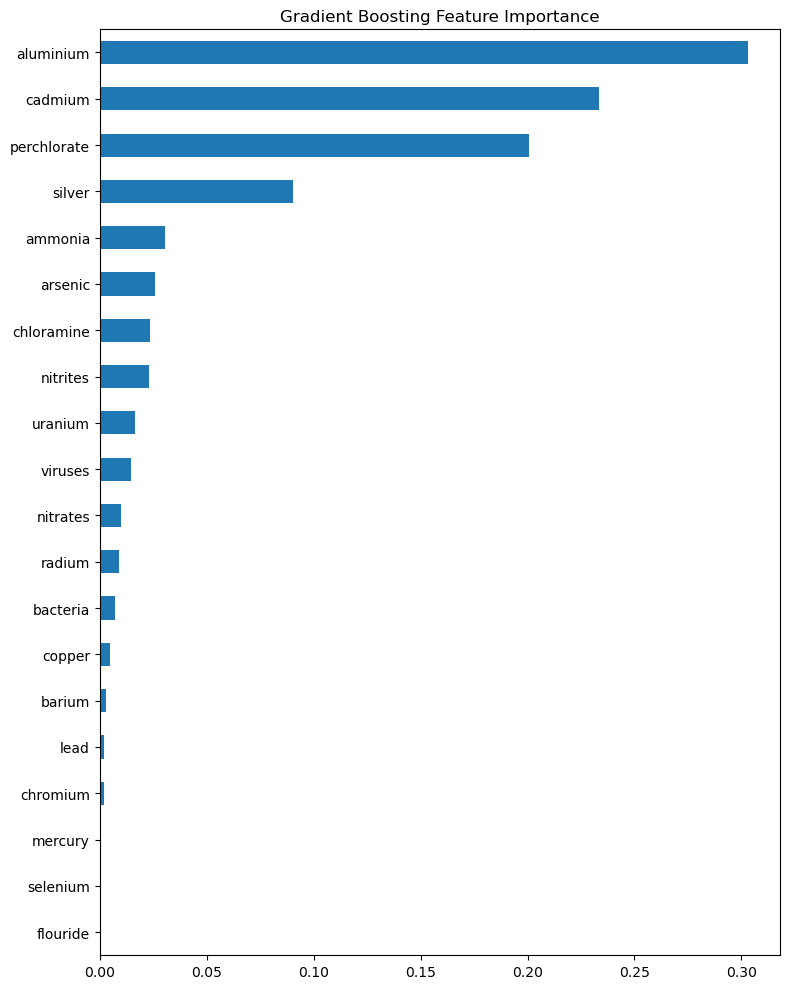

In [62]:
feat_imp = pd.Series(gbc.feature_importances_, index=df.columns[:-1])
feat_imp.sort_values().plot(kind='barh', figsize=(8, 10))  # optional: sort + adjust size
plt.title('Gradient Boosting Feature Importance')
plt.tight_layout()
plt.show()

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2140
         1.0       0.90      0.66      0.76       259

    accuracy                           0.96      2399
   macro avg       0.93      0.83      0.87      2399
weighted avg       0.95      0.96      0.95      2399

Random Forest Confusion Matrix


<AxesSubplot:>

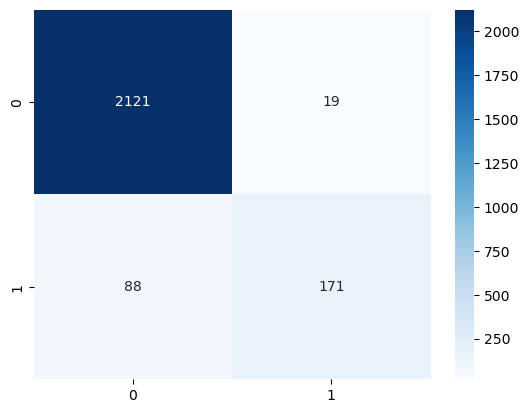

In [63]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
rfcl.fit(xtrain, ytrain)
predict_rfcl = rfcl.predict(xtest)
print(classification_report(ytest, predict_rfcl))
print('Random Forest Confusion Matrix')
y_pred = rfcl.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')


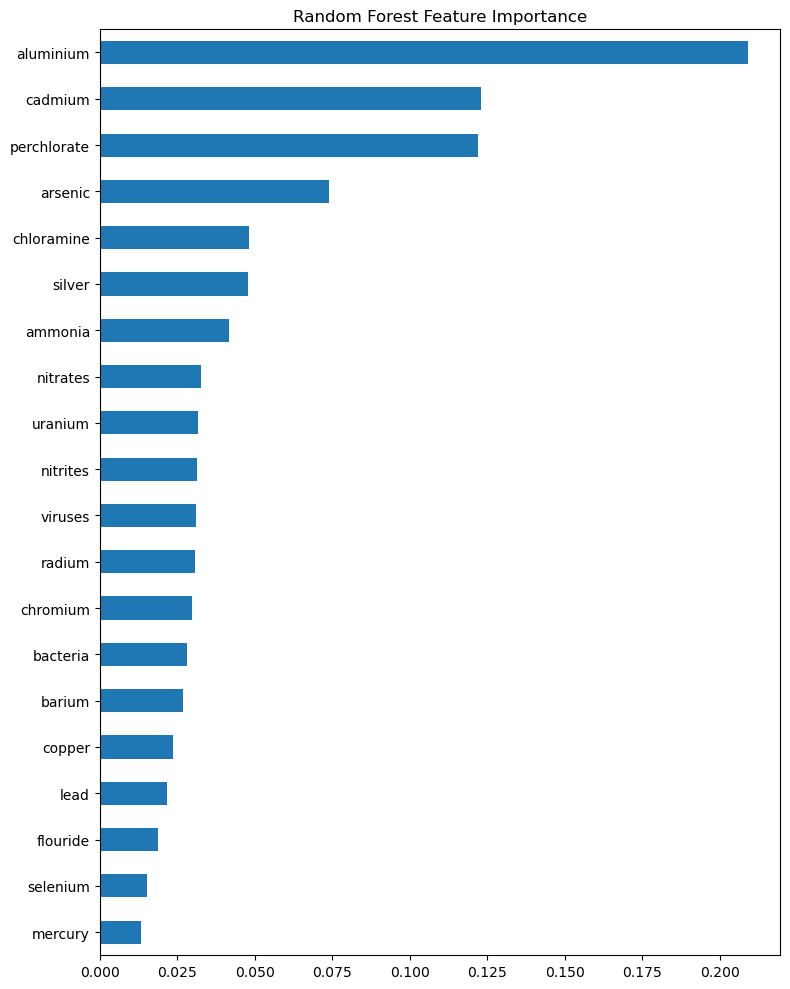

In [64]:
feat_imp = pd.Series(rfcl.feature_importances_, index=df.columns[:-1])
feat_imp.sort_values().plot(kind='barh', figsize=(8, 10))  # optional: sort + adjust size
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2140
         1.0       0.91      0.84      0.87       259

    accuracy                           0.97      2399
   macro avg       0.94      0.91      0.93      2399
weighted avg       0.97      0.97      0.97      2399

Decision Tree Confusion Matrix


<AxesSubplot:>

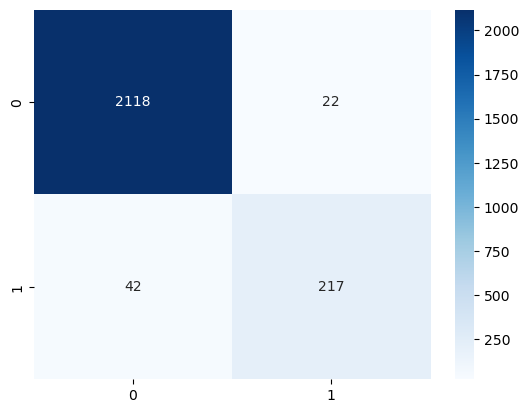

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
bag_dt = BaggingClassifier(base_estimator=dt, n_estimators=100, bootstrap=True)
bag_dt.fit(xtrain, ytrain)
predict_dt = bag_dt.predict(xtest)
print(classification_report(ytest, predict_dt))
print('Decision Tree Confusion Matrix')
y_pred = bag_dt.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')


In [67]:
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 2.2 MB/s eta 0:00:0000:0100:010m


              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2140
         1.0       0.91      0.85      0.88       259

    accuracy                           0.97      2399
   macro avg       0.94      0.92      0.93      2399
weighted avg       0.97      0.97      0.97      2399

XGB Boost Confusion Matrix


<AxesSubplot:>

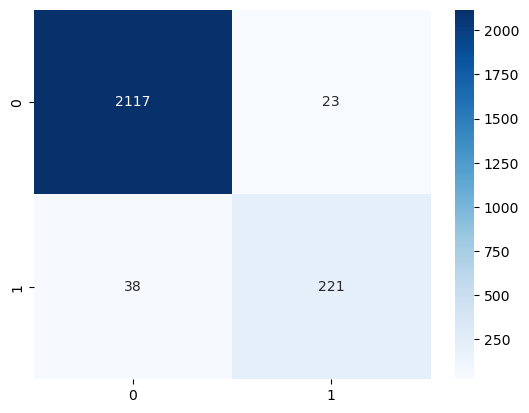

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)
predict_xgb = xgb.predict(xtest)
print(classification_report(ytest, predict_xgb))
print('XGB Boost Confusion Matrix')
y_pred = xgb.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')


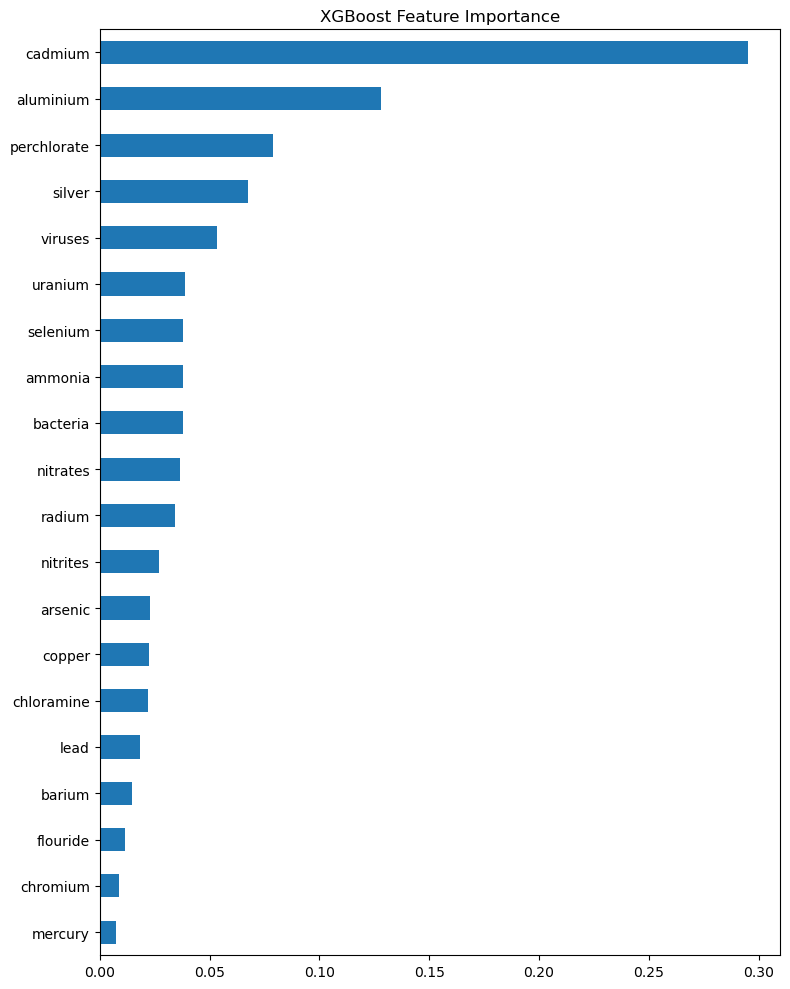

In [69]:
feat_imp = pd.Series(xgb.feature_importances_, index=df.columns[:-1])
feat_imp.sort_values().plot(kind='barh', figsize=(8, 10))  # optional: sort + adjust size
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()


In [71]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 2.2 MB/s eta 0:00:0000:0100:010m


[LightGBM] [Info] Number of positive: 653, number of negative: 4944
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3030
[LightGBM] [Info] Number of data points in the train set: 5597, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116670 -> initscore=-2.024353
[LightGBM] [Info] Start training from score -2.024353
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2140
         1.0       0.90      0.84      0.87       259

    accuracy                           0.97      2399
   macro avg       0.94      0.92      0.93      2399
weighted avg       0.97      0.97      0.97      2399

LGBM Classifier Confusion Matrix


<AxesSubplot:>

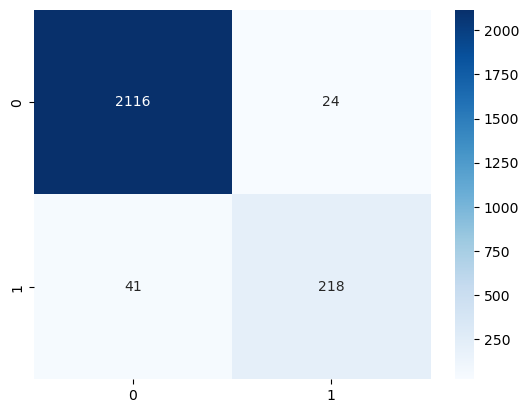

In [72]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(xtrain, ytrain)
predict_lgbm = lgbm.predict(xtest)
print(classification_report(ytest, predict_lgbm))
print('LGBM Classifier Confusion Matrix')
y_pred = lgbm.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')


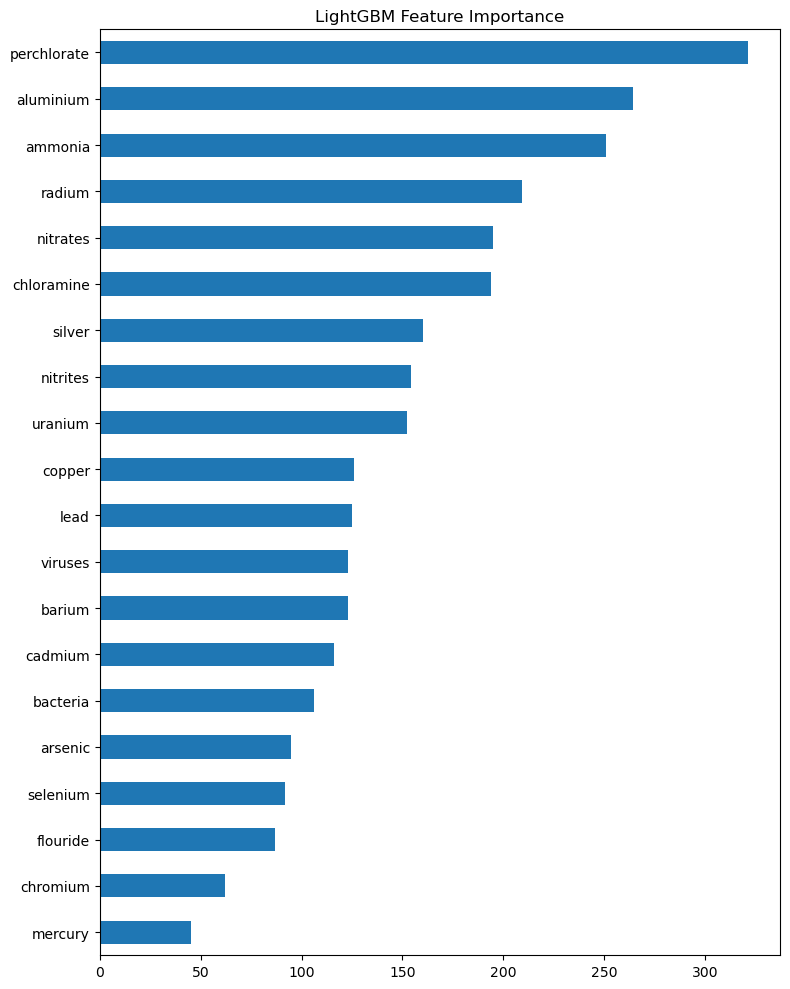

In [73]:
feat_imp = pd.Series(lgbm.feature_importances_, index=df.columns[:-1])
feat_imp.sort_values().plot(kind='barh', figsize=(8, 10))  # optional: sort + adjust size
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95      2140
         1.0       0.68      0.37      0.48       259

    accuracy                           0.91      2399
   macro avg       0.80      0.67      0.72      2399
weighted avg       0.90      0.91      0.90      2399

Logistic Regression Confusion Matrix


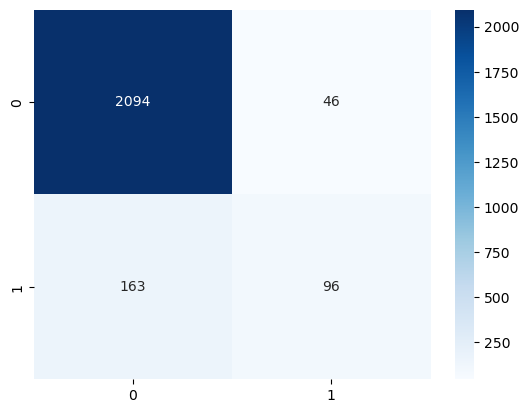

In [74]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(xtrain, ytrain)
predict_log_reg = log_reg.predict(xtest)
print(classification_report(ytest, predict_log_reg))
print('Logistic Regression Confusion Matrix')
y_pred = log_reg.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.show()

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2140
         1.0       0.89      0.54      0.67       259

    accuracy                           0.94      2399
   macro avg       0.92      0.77      0.82      2399
weighted avg       0.94      0.94      0.94      2399

Support Vector Machine Confusion Matrix


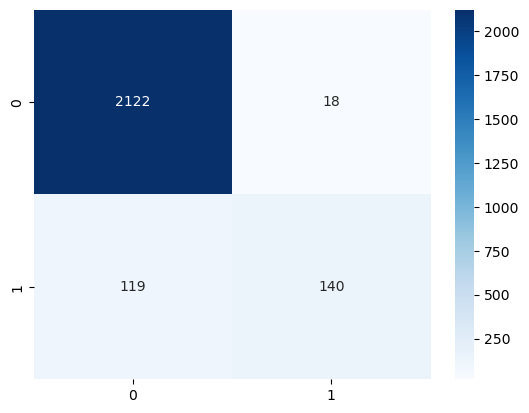

In [75]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(xtrain, ytrain)
predict_svc = svc.predict(xtest)
print(classification_report(ytest, predict_svc))
print('Support Vector Machine Confusion Matrix')
y_pred = svc.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.show()


              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      2140
         1.0       0.67      0.43      0.52       259

    accuracy                           0.92      2399
   macro avg       0.80      0.70      0.74      2399
weighted avg       0.91      0.92      0.91      2399

K-Nearest Neighbors Confusion Matrix


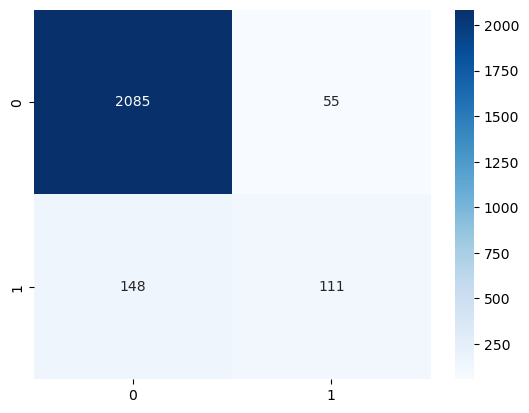

In [76]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
predict_knn = knn.predict(xtest)
print(classification_report(ytest, predict_knn))
print('K-Nearest Neighbors Confusion Matrix')
y_pred = knn.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.show()


In [77]:
from sklearn.metrics import roc_auc_score, roc_curve, auc


In [78]:
y_pred_rfcl = rfcl.predict(xtest)
rfcl_fpr, rfcl_tpr, _ = roc_curve(ytest, y_pred_rfcl)
auc_rfcl = auc(rfcl_fpr, rfcl_tpr)


In [79]:
y_pred_dt = bag_dt.predict(xtest)
dt_fpr, dt_tpr, _ = roc_curve(ytest, y_pred_dt)
auc_dt = auc(dt_fpr, dt_tpr)

In [80]:
y_pred_gbc = gbc.predict(xtest)
gbc_fpr, gbc_tpr, _ = roc_curve(ytest, y_pred_gbc)
auc_gbc = auc(gbc_fpr, gbc_tpr)

y_pred_xgb = xgb.predict(xtest)
xgb_fpr, xgb_tpr, _ = roc_curve(ytest, y_pred_xgb)
auc_xgb = auc(xgb_fpr, xgb_tpr)

y_pred_lgbm = lgbm.predict(xtest)
lgbm_fpr, lgbm_tpr, _ = roc_curve(ytest, y_pred_lgbm)
auc_lgbm = auc(lgbm_fpr, lgbm_tpr)

y_pred_log = log_reg.predict(xtest)
log_fpr, log_tpr, _ = roc_curve(ytest, y_pred_log)
auc_log = auc(log_fpr, log_tpr)

y_pred_svm = svc.predict(xtest)
svm_fpr, svm_tpr, _ = roc_curve(ytest, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

y_pred_knn = knn.predict(xtest)
knn_fpr, knn_tpr, _ = roc_curve(ytest, y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

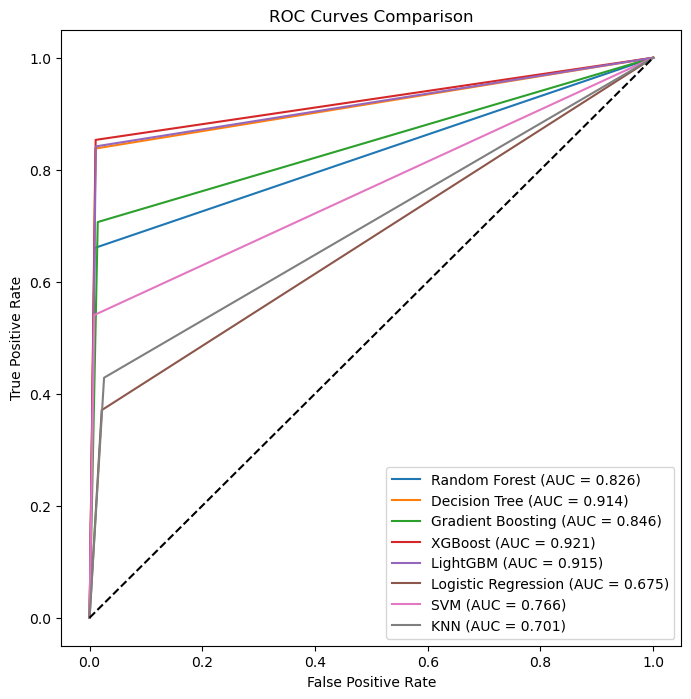

In [81]:
plt.figure(figsize=(8, 8), dpi=100)
plt.plot(rfcl_fpr, rfcl_tpr, label='Random Forest (AUC = %0.3f)' % auc_rfcl)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %0.3f)' % auc_dt)
plt.plot(gbc_fpr, gbc_tpr, label='Gradient Boosting (AUC = %0.3f)' % auc_gbc)
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (AUC = %0.3f)' % auc_xgb)
plt.plot(lgbm_fpr, lgbm_tpr, label='LightGBM (AUC = %0.3f)' % auc_lgbm)
plt.plot(log_fpr, log_tpr, label='Logistic Regression (AUC = %0.3f)' % auc_log)
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.3f)' % auc_svm)
plt.plot(knn_fpr, knn_tpr, label='KNN (AUC = %0.3f)' % auc_knn)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()

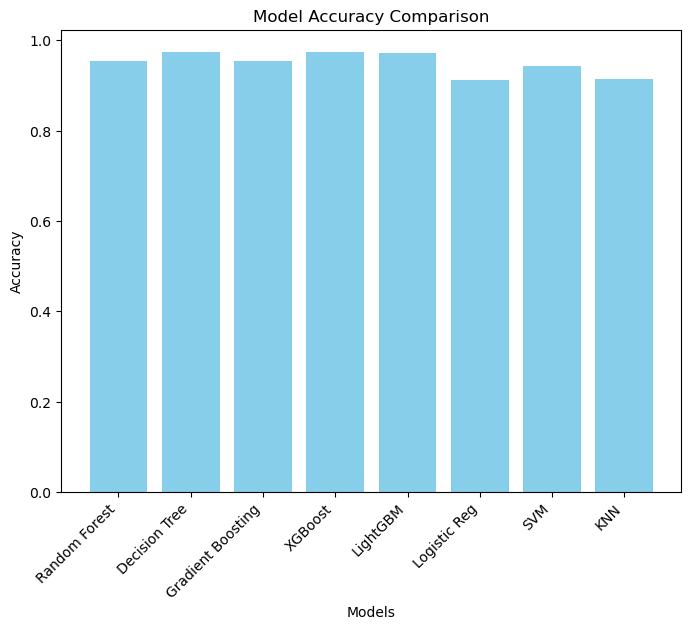

In [82]:
plt.figure(figsize=(8, 6))
models = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'Logistic Reg', 'SVM', 'KNN']
scores = [
    rfcl.score(xtest, ytest),
    bag_dt.score(xtest, ytest),
    gbc.score(xtest, ytest),
    xgb.score(xtest, ytest),
    lgbm.score(xtest, ytest),
    log_reg.score(xtest, ytest),
    svc.score(xtest, ytest),
    knn.score(xtest, ytest)
]

plt.bar(models, scores, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models_dict = {
    "Random Forest": (rfcl, rfcl.predict(xtest)),
    "Decision Tree": (bag_dt, bag_dt.predict(xtest)),
    "Gradient Boosting": (gbc, gbc.predict(xtest)),
    "XGBoost": (xgb, xgb.predict(xtest)),
    "LightGBM": (lgbm, lgbm.predict(xtest)),
    "Logistic Regression": (log_reg, log_reg.predict(xtest)),
    "SVM": (svc, svc.predict(xtest)),
    "KNN": (knn, knn.predict(xtest)),
}

summary_df = pd.DataFrame(columns=["Model", "Accuracy", "F1 Score", "Precision", "Recall", "ROC-AUC"])


for name, (model, y_pred) in models_dict.items():
    acc = accuracy_score(ytest, y_pred)
    f1 = f1_score(ytest, y_pred)
    precision = precision_score(ytest, y_pred)
    recall = recall_score(ytest, y_pred)
    roc_auc = roc_auc_score(ytest, y_pred)
    
    summary_df = pd.concat([summary_df, pd.DataFrame({
        "Model": [name],
        "Accuracy": [acc],
        "F1 Score": [f1],
        "Precision": [precision],
        "Recall": [recall],
        "ROC-AUC": [roc_auc]
    })], ignore_index=True)

summary_df.sort_values(by="F1 Score", ascending=False, inplace=True)
print(summary_df.round(3))

                 Model  Accuracy  F1 Score  Precision  Recall  ROC-AUC
3              XGBoost     0.975     0.879      0.906   0.853    0.921
1        Decision Tree     0.973     0.871      0.908   0.838    0.914
4             LightGBM     0.973     0.870      0.901   0.842    0.915
2    Gradient Boosting     0.955     0.774      0.855   0.707    0.846
0        Random Forest     0.955     0.762      0.900   0.660    0.826
6                  SVM     0.943     0.671      0.886   0.541    0.766
7                  KNN     0.915     0.522      0.669   0.429    0.701
5  Logistic Regression     0.913     0.479      0.676   0.371    0.675
